![Image téléchargé sur Kaggle](image.png)

# <p style="text-align: center;">House Prices - Advanced Regression Techniques</p>

# Project description
This project focuses on building and applying advanced regression techniques, such as XGBoost Regressor and Lasso, to predict house prices. The dataset used is the Ames Housing Dataset, which contains detailed information about residential homes in Ames, Iowa. The goal is to leverage the dataset features to create a robust and accurate predictive model capable of estimating housing prices. <br>
To assess the performance of the models, we will use the **Root Mean Squared Error (RMSE)**, **R² Score** and **MAPE** metrics. 

# Dataset Description

1. **Id**: Unique identifier for each property. 
2. **MSSubClass**: Identifies the type of dwelling involved in the sale. 
3. **MSZoning**: Identifies the general zoning classification of the sale. 
4. **LotFrontage**: Linear feet of street connected to the property. 
5. **LotArea**: Lot size in square feet. 
6. **Street**: Type of road access to property. 
7. **Alley**: Type of alley access to property. 
8. **LotShape**: General shape of property.
9. **LandContour**: Flatness of the property.
10. **Utilities**: Type of utilities available.
11. **LotConfig**: Lot configuration.
12. **LandSlope**: Slope of property.  
13. **Neighborhood**: Physical locations within Ames city limits.  
14. **Condition1**: Proximity to main road or railroad.  
15. **Condition2**: Proximity to main road or railroad.  
16. **BldgType**: Type of dwelling.  
17. **HouseStyle**: Style of dwelling.  
18. **OverallQual**: Rates the overall material and finish of the house.
19. **OverallCond**: Rates the overall condition of the house.
20. **YearBuilt**: Original construction date.
21. **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions).
22. **RoofStyle**: Type of roof.  
23. **RoofMatl**: Roof material.  
24. **Exterior1st**: Exterior covering on house.  
25. **Exterior2nd**: Exterior covering on house (if more than one material).  
26. **MasVnrType**: Masonry veneer type.  
27. **MasVnrArea**: Masonry veneer area in square feet.
28. **ExterQual**: Evaluates the quality of the material on the exterior.
29. **ExterCond**: Evaluates the present condition of the material on the exterior.
30. **Foundation**: Type of foundation.  
31. **BsmtQual**: Height of the basement.
32. **BsmtCond**: General condition of the basement.
33. **BsmtExposure**: Walkout or garden level basement walls.
34. **BsmtFinType1**: Quality of basement finished area.
35. **BsmtFinSF1**: Type 1 finished square feet.
36. **BsmtFinType2**: Quality of second finished area (if present).
37. **BsmtFinSF2**: Type 2 finished square feet.
38. **BsmtUnfSF**: Unfinished square feet of basement area.
39. **TotalBsmtSF**: Total square feet of basement area.
40. **Heating**: Type of heating.  
41. **HeatingQC**: Heating quality and condition.
42. **CentralAir**: Central air conditioning.
43. **Electrical**: Electrical system.  
44. **1stFlrSF**: First-floor square feet.
45. **2ndFlrSF**: Second-floor square feet.
46. **LowQualFinSF**: Low-quality finished square feet (all floors).
47. **GrLivArea**: Above-grade (ground) living area square feet.
48. **BsmtFullBath**: Basement full bathrooms.
49. **BsmtHalfBath**: Basement half bathrooms.
50. **FullBath**: Full bathrooms above grade.
51. **HalfBath**: Half bathrooms above grade.
52. **BedroomAbvGr**: Number of bedrooms above basement level.
53. **KitchenAbvGr**: Number of kitchens above basement level.
54. **KitchenQual**: Kitchen quality.
55. **TotRmsAbvGrd**: Total rooms above grade.
56. **Functional**: Home functionality rating.
57. **Fireplaces**: Number of fireplaces.
58. **FireplaceQu**: Fireplace quality.
59. **GarageType**: Garage location.  
60. **GarageYrBlt**: Year garage was built.
61. **GarageFinish**: Interior finish of the garage.
62. **GarageCars**: Size of garage in car capacity.
63. **GarageArea**: Size of garage in square feet.
64. **GarageQual**: Garage quality.
65. **GarageCond**: Garage condition.
66. **PavedDrive**: Paved driveway.
67. **WoodDeckSF**: Wood deck area in square feet.
68. **OpenPorchSF**: Open porch area in square feet.
69. **EnclosedPorch**: Enclosed porch area in square feet.
70. **3SsnPorch**: Three-season porch area in square feet.
71. **ScreenPorch**: Screen porch area in square feet.
72. **PoolArea**: Pool area in square feet.
73. **PoolQC**: Pool quality.
74. **Fence**: Fence quality.
75. **MiscFeature**: Miscellaneous feature not covered in other categories.
76. **MiscVal**: Value of miscellaneous feature.
77. **MoSold**: Month sold.
78. **YrSold**: Year sold.
79. **SaleType**: Type of sale.
80. **SaleCondition**: Condition of sale.
81. **SalePrice**: Sale price of the property (Target variable).

In [169]:
# Data description
with open("data_description_hpred.txt", "r") as file:
    content = file.read()
print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Importing libraries

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
import pickle

## Loading the Datasets

In [272]:
# Loading the train, test and submission files
train = pd.read_csv("train_hpred.csv")
test = pd.read_csv("test_hpred.csv")
sub = pd.read_csv("sample_submission_hpred.csv")

In [203]:
# Datasets shape
print("The train dataset shape is: {}.".format(train.shape))
print("The test dataset shape is: {}.".format(test.shape))

The train dataset shape is: (1460, 81).
The test dataset shape is: (1459, 80).


In [204]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [205]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [288]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Train data preprocessing

In [207]:
# General informations about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**The data types include 35 integer columns, 3 float columns, and 43 categorical (object) columns. While most columns are complete, nineteen of them have missing values, such as LotFrontage, Alley, and GarageType, which will require cleaning or imputation during preprocessing.**

In [208]:
# Columns with missing values
print("Here are infos about columns with missing values:\n")
missing_values = train.isna().sum()  
for column, missing in missing_values.items():
    if missing > 0: 
        print("{}:  {}:  {}".format(column, missing, train[column].dtypes))

Here are infos about columns with missing values:

LotFrontage:  259:  float64
Alley:  1369:  object
MasVnrType:  872:  object
MasVnrArea:  8:  float64
BsmtQual:  37:  object
BsmtCond:  37:  object
BsmtExposure:  38:  object
BsmtFinType1:  37:  object
BsmtFinType2:  38:  object
Electrical:  1:  object
FireplaceQu:  690:  object
GarageType:  81:  object
GarageYrBlt:  81:  float64
GarageFinish:  81:  object
GarageQual:  81:  object
GarageCond:  81:  object
PoolQC:  1453:  object
Fence:  1179:  object
MiscFeature:  1406:  object


In [209]:
# Filling the missing values
fill_values = {}
for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        fill_values[col] = train[col].median()  
    elif train[col].dtype == 'object':
        fill_values[col] = 'missing'
        
for row, col in fill_values.items():
    print("{}: {}".format(row, col))
    
train_cleaned = train.fillna(fill_values)    

Id: 730.5
MSSubClass: 50.0
MSZoning: missing
LotFrontage: 69.0
LotArea: 9478.5
Street: missing
Alley: missing
LotShape: missing
LandContour: missing
Utilities: missing
LotConfig: missing
LandSlope: missing
Neighborhood: missing
Condition1: missing
Condition2: missing
BldgType: missing
HouseStyle: missing
OverallQual: 6.0
OverallCond: 5.0
YearBuilt: 1973.0
YearRemodAdd: 1994.0
RoofStyle: missing
RoofMatl: missing
Exterior1st: missing
Exterior2nd: missing
MasVnrType: missing
MasVnrArea: 0.0
ExterQual: missing
ExterCond: missing
Foundation: missing
BsmtQual: missing
BsmtCond: missing
BsmtExposure: missing
BsmtFinType1: missing
BsmtFinSF1: 383.5
BsmtFinType2: missing
BsmtFinSF2: 0.0
BsmtUnfSF: 477.5
TotalBsmtSF: 991.5
Heating: missing
HeatingQC: missing
CentralAir: missing
Electrical: missing
1stFlrSF: 1087.0
2ndFlrSF: 0.0
LowQualFinSF: 0.0
GrLivArea: 1464.0
BsmtFullBath: 0.0
BsmtHalfBath: 0.0
FullBath: 2.0
HalfBath: 0.0
BedroomAbvGr: 3.0
KitchenAbvGr: 1.0
KitchenQual: missing
TotRmsAbvGrd

In [210]:
# Checking the result
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Test data preprocessing

In [211]:
# General informations about the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [212]:
# Columns with missing values
print("Here are infos about columns with missing values:\n")
test_missing_values = test.isna().sum()  
for column, missing in test_missing_values.items():
    if missing > 0: 
        print("{}:  {}:  {}".format(column, missing, test[column].dtypes))

Here are infos about columns with missing values:

MSZoning:  4:  object
LotFrontage:  227:  float64
Alley:  1352:  object
Utilities:  2:  object
Exterior1st:  1:  object
Exterior2nd:  1:  object
MasVnrType:  894:  object
MasVnrArea:  15:  float64
BsmtQual:  44:  object
BsmtCond:  45:  object
BsmtExposure:  44:  object
BsmtFinType1:  42:  object
BsmtFinSF1:  1:  float64
BsmtFinType2:  42:  object
BsmtFinSF2:  1:  float64
BsmtUnfSF:  1:  float64
TotalBsmtSF:  1:  float64
BsmtFullBath:  2:  float64
BsmtHalfBath:  2:  float64
KitchenQual:  1:  object
Functional:  2:  object
FireplaceQu:  730:  object
GarageType:  76:  object
GarageYrBlt:  78:  float64
GarageFinish:  78:  object
GarageCars:  1:  float64
GarageArea:  1:  float64
GarageQual:  78:  object
GarageCond:  78:  object
PoolQC:  1456:  object
Fence:  1169:  object
MiscFeature:  1408:  object
SaleType:  1:  object


**So the test data also has missing values, we will fill them with the amounts we filled the train data to prevent data leakage.**

In [213]:
# Filling the missing values
test_cleaned = test.fillna(fill_values)    

In [214]:
# Checking the result
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Now our both train and test datasets are clean. We'll dive into some data exploration before buiding the ML models.**

## Data exploration

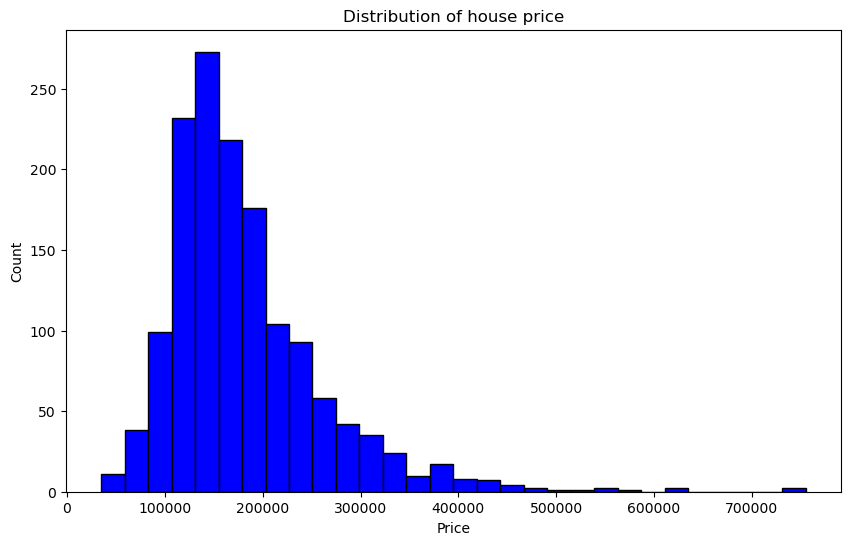

In [215]:
# Visualization of the SalePrice distribution
plt.figure(figsize=(10,6))
plt.hist(train_cleaned['SalePrice'], bins=30, color ='blue', edgecolor='black')
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

<Axes: >

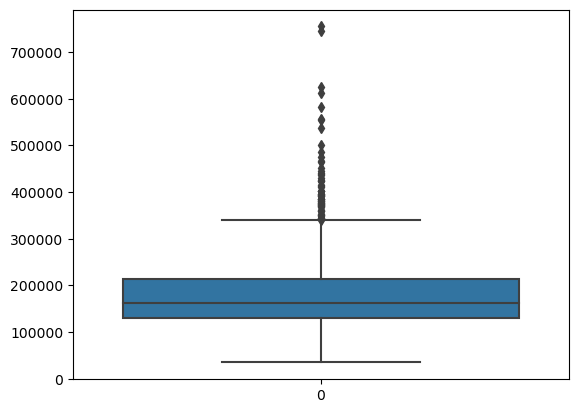

In [216]:
# Visualization of the SalePrice distribution with a boxplot
sns.boxplot(train_cleaned['SalePrice'])

The boxpot shows the presence of outliers that we'll have to eliminate.

In [217]:
# Dealing with outliers
q1 = train_cleaned['SalePrice'].quantile(0.25)
q3 = train_cleaned['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print("lower bound :{}".format(lower_bound))
print("upper bound :{}".format(upper_bound))
outliers = train_cleaned[(train_cleaned['SalePrice']<lower_bound) | (train_cleaned['SalePrice']>upper_bound)]
print("The number of outliers is:{}".format(len(outliers)))

lower bound :3937.5
upper bound :340037.5
The number of outliers is:61


<Axes: >

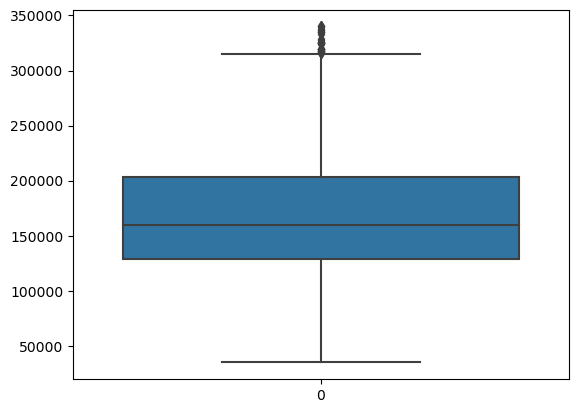

In [218]:
# Filtering the dataframe and vvisualizing the boxplot again
train_cleaned = train_cleaned[(train_cleaned['SalePrice'] >= lower_bound) & (train_cleaned['SalePrice'] <= upper_bound)]
sns.boxplot(train_cleaned['SalePrice'])

In [221]:
# Checking the correlation between the numerical columns and target variable
numeric_cols = train_cleaned.select_dtypes(include=['int64','float64'])
correlation_matrix = numeric_cols.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_target)

SalePrice        1.000000
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
GarageYrBlt      0.475781
TotRmsAbvGrd     0.472292
Fireplaces       0.453010
MasVnrArea       0.350541
OpenPorchSF      0.325791
2ndFlrSF         0.317358
WoodDeckSF       0.302339
LotFrontage      0.295796
BsmtFinSF1       0.290377
HalfBath         0.278831
LotArea          0.249812
BsmtUnfSF        0.222795
BsmtFullBath     0.202185
BedroomAbvGr     0.201610
ScreenPorch      0.108851
MoSold           0.070478
PoolArea         0.048682
3SsnPorch        0.043324
BsmtFinSF2       0.007154
Id              -0.011984
MiscVal         -0.012872
BsmtHalfBath    -0.018827
YrSold          -0.028245
OverallCond     -0.048005
LowQualFinSF    -0.058086
MSSubClass      -0.060111
EnclosedPorch   -0.144996
KitchenAbvGr    -0.147385
Name: SalePr

Text(0, 0.5, 'Correlation')

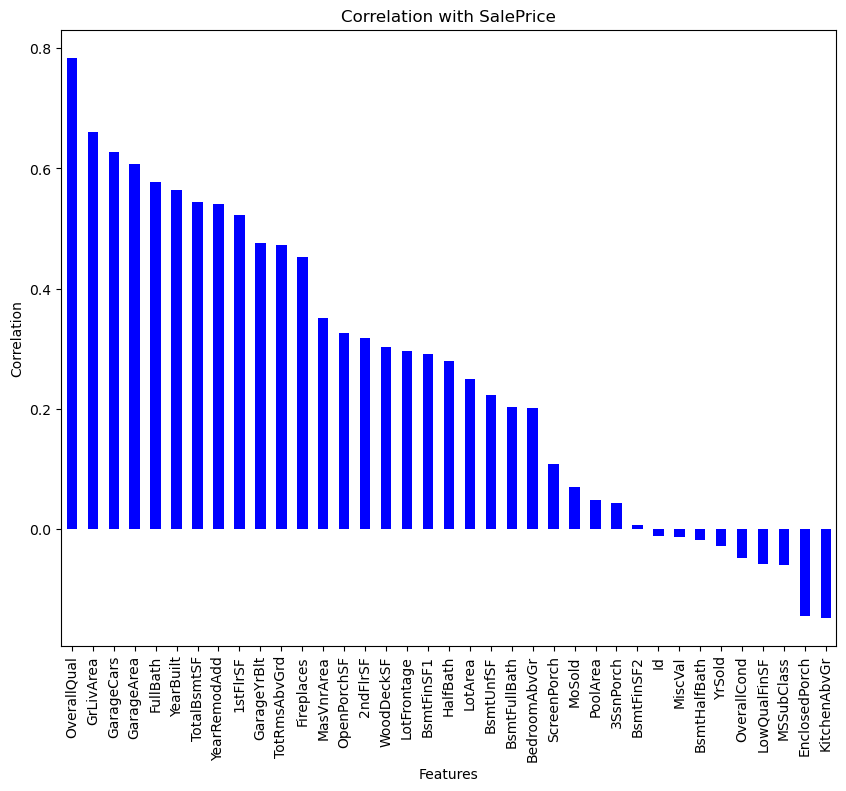

In [222]:
# Checking the correlation with a plot
plt.figure(figsize=(10,8))
correlation_with_target.drop('SalePrice').plot(kind='bar', color='blue')
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

In [223]:
# Statistical summary of the target variable
train_cleaned["SalePrice"].describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

## Data modeling

### Data preparation for the modeling

In [224]:
# Checking the datasets column types
data_train = train_cleaned.copy()
data_test = test_cleaned.copy()
column_types_counts = data.dtypes.value_counts()
print(column_types_counts)

object     43
int64      35
float64     3
Name: count, dtype: int64


In [225]:
# Data Preparation
data_combined = pd.concat([data_train, data_test], axis=0)

for col in data_combined.select_dtypes(include='object').columns:
    data_combined[col] = data_combined[col].astype(str)

label_encoders = {}
for col in data_combined.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_combined[col] = le.fit_transform(data_combined[col])
    label_encoders[col] = le

data_train_encoded = data_combined[:len(data_train)]
data_test_encoded = data_combined[len(data_train):]

In [226]:
# Few rows of the new dataset after the encoding
data_train_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0


In [227]:
# Few rows of the new dataset after the encoding
data_test_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2,80.0,11622,1,2,3,3,0,...,0,3,2,4,0,6,2010,8,4,NaN
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,3,4,0,12500,6,2010,8,4,NaN
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,3,2,4,0,3,2010,8,4,NaN
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,3,4,4,0,6,2010,8,4,NaN
4,1465,120,3,43.0,5005,1,2,0,1,0,...,0,3,4,4,0,1,2010,8,4,NaN


In [228]:
# Dropping the target varuable from the test data
data_test_encoded = data_test_encoded.drop('SalePrice', axis=1)

In [231]:
# Splitting dataset 
X= data_train_encoded.drop('SalePrice', axis=1) 
y = data_train_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
# MAPE (Mean Absolute Percentage Error) metric formula
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

### Model building

#### XGBosst

In [267]:
# Modeling
xgb_model = XGBRegressor(subsample = 1.0, 
                             n_estimators = 300, 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             colsample_bytree = 1.0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [268]:
# Model evaluation
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print("XGBoost Results:")
print("RMSE: {}".format(xgb_rmse))
print("R2 Score: {}".format(xgb_r2))
print("MAPE: {}".format(xgb_mape))

XGBoost Results:
RMSE: 18584.202470827564
R2 Score: 0.8914201796858853
MAPE: 0.08089187224898019


#### Lasso

In [274]:
# Modeling
lasso = Lasso(alpha = 1000)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [275]:
# Model evaluation
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
print("Lasso Regression Results:")
print("RMSE: {}".format(lasso_rmse))
print("R2 Score: {}".format(lasso_r2))
print("MAPE: {}".format(lasso_mape))

Lasso Regression Results:
RMSE: 21027.132924205394
R2 Score: 0.8609978933860238
MAPE: 0.09921770764778441


In [310]:
# Training whole train dataset with the xgb model and predict test dataset price
X_train_final = data_train_encoded.drop('SalePrice', axis=1) 
y_train_final = data_train_encoded['SalePrice']
X_test_final = data_test_encoded

xgb_model.fit(X_train_final, y_train_final)

# Predict on the test dataset
test_predictions = xgb_model.predict(X_test_final)

# Saving predictions
predictions = pd.DataFrame({'Id': range(1460, 1460 + len(test_predictions)), 'SalePrice': test_predictions})
predictions = predictions.iloc[1:]
predictions.to_csv('xgb_predictions.csv', index=False)
print("Training on the full dataset is complete. Predictions saved!")

Training on the full dataset is complete. Predictions saved!


## Conclusion

In this project, we applied two advanced regression techniques, **XGBoost** and **Lasso Regression**, to predict house prices using the Ames Housing Dataset. Both models demonstrated strong predictive performance, but there were notable differences in their results.

- **XGBoost** produced the best performance with:
  - **RMSE**: 18,584.20 (lower error, indicating more accurate predictions)
  - **R² Score**: 0.891 (suggesting the model explains 89% of the variance in the data)
  - **MAPE**: 8.09% (indicating that, on average, the model's predictions were off by 8.09%)

- **Lasso Regression** showed good performance, but with slightly less accuracy:
  - **RMSE**: 21,027.13 (higher error compared to XGBoost, meaning less precise predictions)
  - **R² Score**: 0.861 (explains 86.1% of the variance in the data)
  - **MAPE**: 9.92% (larger prediction error on average than XGBoost)
  
Both models perform quite well for predicting housing prices, but **XGBoost** outperforms **Lasso Regression** in terms of **RMSE**, **R²**, and **MAPE**, making it the better model for this dataset. The **XGBoost model** is recommended for further actions due to its superior accuracy and ability to handle complex patterns in the data.